In [ ]:
%load_ext autoreload
%autoreload 2

In [22]:
from GENE_ML.gene_ml.tools import load_pkl, save_pkl
import os
data_set = load_pkl(os.path.join('data_sets','5000s7p.pkl'))

In [23]:
from GENE_ML.gene_ml.tools import load_pkl, save_pkl

save_pkl('5000s7p_df.pkl', data_set.df)

In [3]:
data_set.test_percentage

50

In [19]:
import os
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml import visualise as vis
from GENE_ML.gene_ml.results.results import Results

results_gpr_name = 'results_5000s_7p_gpr_50tp_2'
gpr = GPR('gpr')
gpr.tune_hypers(data_set.x_train, data_set.growthrate_train)
print("OPTIMISER",gpr.regressor.preferred_optimizer)


results_gpr = Results(results_gpr_name)
results_gpr.growthrate_predict_seen, results_gpr.growthrate_predict_seen_errors = gpr.predict(data_set.x_train)
results_gpr.growthrate_predict_unseen, results_gpr.growthrate_predict_unseen_errors = gpr.predict(data_set.x_test)

if not os.path.exists(results_gpr.path):
    results_gpr.save()

OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 6991.307832976152
Number of Parameters : 9
Number of Optimization Parameters : 9
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   (7,)  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = 2191.5076532698804
Optimization restart 2/3, f = -1132.952057350176
Optimization restart 3/3, f = -1132.9429818657136
RESULTING HYPERS:
 
Name : GP regression
Objective : -1132.952057350176
Number of Parameters : 9
Number of Optimization Parameters : 9
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     19.395226534202283  |      +ve      |        
  rbf.lengthscale          |                   (7,)  |      +ve      |

In [20]:
from GENE_ML.gene_ml.results.results import Results
results_gpr_name = 'results_5000s_7p_gpr_50tp_2'
results_gpr = Results(results_gpr_name)
results_gpr = results_gpr.load()

 /tmp/ipykernel_123204/3739347386.py:22: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


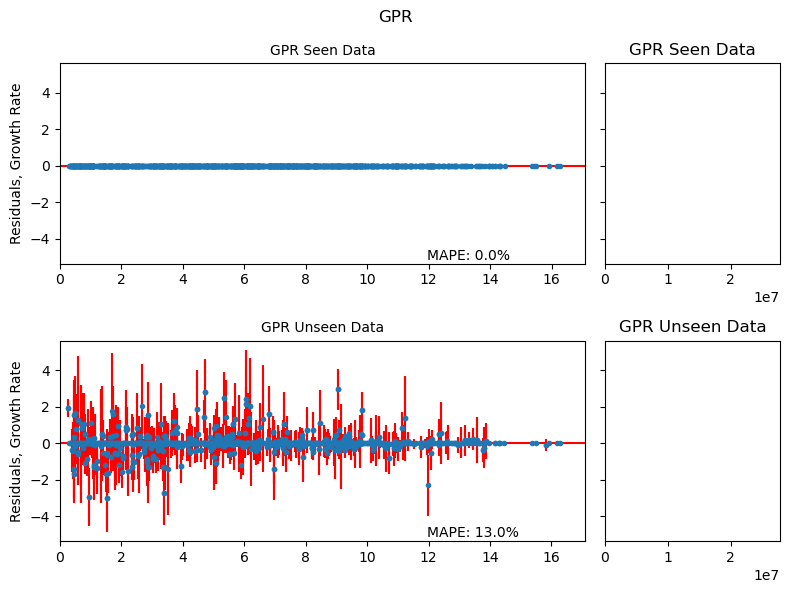

In [21]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis

model_name = 'GPR'
ncol=2
nrow=2
width=4
height = 3
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=100, sharey=True, gridspec_kw={'width_ratios': [3, 1]})
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, results_gpr.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data', y_pred_err=results_gpr.growthrate_predict_seen_errors)
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, results_gpr.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data', y_pred_err=results_gpr.growthrate_predict_unseen_errors)
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

ax4.sharex(ax2)
ax4.set_ylabel('')
ax2.set_ylabel('')
fig_residuals.suptitle(model_name)
fig_residuals.tight_layout()
fig_residuals.show()
